# <font color = blue> Importing Libraries </font>

In [1]:
import pandas as pd
from sklearn.utils import resample
import re
import string

# <font color = blue> Data Exploration </font>

In [2]:
# Reading data
Data = pd.read_json("/content/drive/MyDrive/Aim Technology/Preprocessing/Dialects-with-text.json", 
                    dtype = 'string')

In [3]:
# Display a sample from the data frame
Data.head()

,id,dialect,Text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [4]:
# Show a dialect sample
# Data[Data['id']=='1175358310087892992']['Text']
Data[Data['id']=='1010995548676087808']['Text']

2130    @iraqitweet @HNabeel لاحول الله والله واحد ميع...
Name: Text, dtype: object

<font color = blue> As we see from the above sample, the dialect pattern is like the following `(@\w+\s)` one or more + our Arabic text </font>



In [5]:
# The data frame dimension
Data.shape

(458197, 3)

In [6]:
# Display the data frame info
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  object
 1   dialect  458197 non-null  object
 2   Text     458197 non-null  object
dtypes: object(3)
memory usage: 14.0+ MB


In [7]:
# Create a data frame of the dialect counts
dialects_count = Data['dialect'].value_counts()
# dialects_count

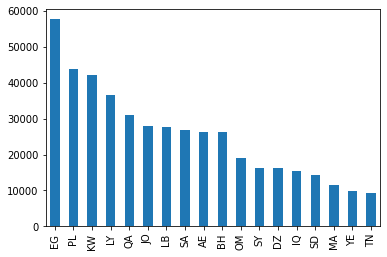

In [8]:
# Explore the counts
dialects_count.sort_values(ascending=False).plot(kind='bar')

As we see from the above count plot, we have a skewed results `right skewed`. As a result of this data skewness we will find that the `EG, PL, KW, LY, QA` has the majority number of samples. On the other hand we will find that the `IQ, SD, MA, YE, TN` has the lowest number of samples.
>
This means that we have a data `imbalance` and so we need a sampling technique to make it balanced. 

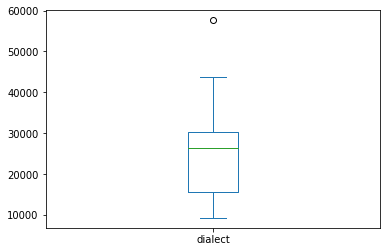

In [9]:
# Draw a box plot
dialects_count.sort_values(ascending=False).plot(kind='box')

# <font color = blue> Data Balancing (Sampling) </font>

In [10]:
# A list to combine the sampled data frames
resampled_df_lst = []

# Create a list of the unique dialects
dilct_clases = Data['dialect'].unique()

In [11]:
# Iterate over each dialect and create a sampled data frame
for dialect in dilct_clases:
  # Fetch the data of each dialect 
  dilct_df = Data[Data['dialect']==dialect]
  # Sampling
  df_sampled = resample(dilct_df, 
                                 replace=True,     # sample with replacement
                                 n_samples=30000,    # number of samples
                                 random_state=83) # reproducible results
  resampled_df_lst.append(df_sampled)

In [12]:
# Concate the separate data frames into single df
dilcts_df_sampled = pd.concat(resampled_df_lst)

In [13]:
# Display a sample 
dilcts_df_sampled.head()

,id,dialect,Text
2130,1010995548676087808,IQ,@iraqitweet @HNabeel لاحول الله والله واحد ميع...
11799,754354918652207104,IQ,@aadashtimp لانهم المخططين والمشاركين في الجرب...
13288,625174254003195904,IQ,"@AboodObey هل مرة من صمصومة ئلبي ""تفووو عليك"" ..."
12071,741035858179035136,IQ,@albardy07 هههههه لا لا هاي قويه بعضلات
11520,788003699754950656,IQ,@AaRcx الحمد لله سيدنا وانت كيف حالك


In [14]:
# Print the shape of the sampled df
dilcts_df_sampled.shape

(540000, 3)

# <font color = blue> Text Cleaning</font>

<font color = blue> Required Functions for Text Cleaning</font>

In [15]:
#Preprocess data (removing punktuations)
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [16]:
# normalize_arabic
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    # text = re.sub("گ", "ك", text)
    text = re.sub("ك","گ" ,text)
    text = re.sub("ن", "ﻥ̴", text)
    text = re.sub("🤔", " ", text)
    return text

In [17]:
# remove_repeating_char
def remove_repeating_char(text):
  # text = re.sub(r'(.)\1+\s', r'\1', text)
  # text = re.sub(r'\b(.)+', r'\1', text)
  # text = re.sub(r'(.)+\b', r'\1', text)
  text = re.sub(r'(.)\1+', r'\1', text)
  return text

In [18]:
# clean_text for applying all functions
def clean_text(text): 
    # Clean the whole data frame
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\.+', '', text)
    text = re.sub(r'\b̴ |̴ \b', ' ', text)
    # text = re.sub(r'̴ \b', ' ', text)
    text = re.sub(r'(@\w+\s*)', ' ', text)


    # cleaning dialect text
    for letter in '#.][!XR':
      # text = text.astype(str).str.replace(letter,'')
      text = text.replace(letter,'')


    #Replace @username with empty string
    text = re.sub('@[^\s]+', ' ', text)    
    #Convert www.* or https?://* to " "
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
    #Replace #word with word
    text = re.sub(r'#([^\s]+)', r'\1', text)


    # remove punctuations
    text= remove_punctuations(text)


    # # remove repeated letters
    # text=remove_repeating_char(text)


    # # normalize the text
    # text= normalize_arabic(text)
    
    return text

<font color = blue> NOW, Apply text cleaning on the whole data frame</font>

In [19]:
# apply used to call the method processpost
dilcts_df_sampled['Text'] = dilcts_df_sampled['Text'].apply(lambda text: clean_text(text)) 
dilcts_df_sampled['Text']

2130                      لاحول الله والله واحد ميعرف شيكول
11799      لانهم المخططين والمشاركين في الجربمه هم اساس ...
13288      هل مرة من صمصومة ئلبي تفووو عليك اني الغلطان ...
12071                          هههههه لا لا هاي قويه بعضلات
11520                         الحمد لله سيدنا وانت كيف حالك
                                ...                        
437155    🤔يتصلون فيه ويترجونه ويأمرهم إذا تبوني تَعَالَ...
447347    ‏​ﮪاﻟزﻣﻥ اﻟﮔل ﻳﻗدر ﻳﮔۅﻥ ﻋﻋاشق ﺑس ﻣﻳﻥ ﻳﻗدر ﻳﮔوو...
440736                       الأقوى منهم الي مب مفتكر أصلًا
441041     اخوي أنا ما عندي خلاف مع احد و الرياضه تجمع و...
445279    في اشياء كانت تضايقني واكرهامع الزمن صرت احسها...
Name: Text, Length: 540000, dtype: object

In [20]:
dilcts_df_sampled.shape

(540000, 3)

# <font color = blue> Save the modified data frame </font>

In [21]:
# Reset the index, in order to be allowed for saving
dilcts_df_sampled.reset_index(inplace=True)

In [22]:
# Save the data in a file
dilcts_df_sampled.to_json('/content/drive/MyDrive/Aim Technology/Preprocessing/Dialects-with-text-clean.json', 
                          index = True)

In [23]:
# Check the saved file 
dialect_df = pd.read_json('/content/drive/MyDrive/Aim Technology/Preprocessing/Dialects-with-text-clean.json', 
                          dtype = 'string')
dialect_df.head()

,index,id,dialect,Text
0,2130,1010995548676087808,IQ,لاحول الله والله واحد ميعرف شيكول
1,11799,754354918652207104,IQ,لانهم المخططين والمشاركين في الجربمه هم اساس ...
2,13288,625174254003195904,IQ,هل مرة من صمصومة ئلبي تفووو عليك اني الغلطان ...
3,12071,741035858179035136,IQ,هههههه لا لا هاي قويه بعضلات
4,11520,788003699754950656,IQ,الحمد لله سيدنا وانت كيف حالك


In [24]:
# Check the shape. Is it the same as the original data frame
dialect_df.shape

(540000, 4)

In [25]:
# Check for nulls
dialect_df['id'].isnull().sum()

0

In [26]:
# Check for duplicates in the id
dialect_df.duplicated(subset=['id']).sum()

244934